In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns    
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [58]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [59]:
df.isna().sum()
categorical_columns=list(df.columns[df.dtypes=='object'])
numerical_columns=list(df.columns[df.dtypes!='object'])


df[categorical_columns] = df[categorical_columns].fillna('NA')
df[numerical_columns] = df[numerical_columns].fillna(0)
df.isna().sum()
df.industry.value_counts()
df.industry.mode()



0    retail
Name: industry, dtype: object

In [60]:
categorical_columns,numerical_columns
df_fulltrain,df_test=train_test_split(df,test_size=0.2,random_state=42)
df_train,df_val=train_test_split(df_fulltrain,test_size=0.25,random_state=42)
df[numerical_columns].corr()



,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879,0.435914
annual_income,0.009770,1.000000,0.027036,0.015610,0.053131
interaction_count,-0.023565,0.027036,1.000000,0.009888,0.374573
lead_score,-0.004879,0.015610,0.009888,1.000000,0.193673
converted,0.435914,0.053131,0.374573,0.193673,1.000000


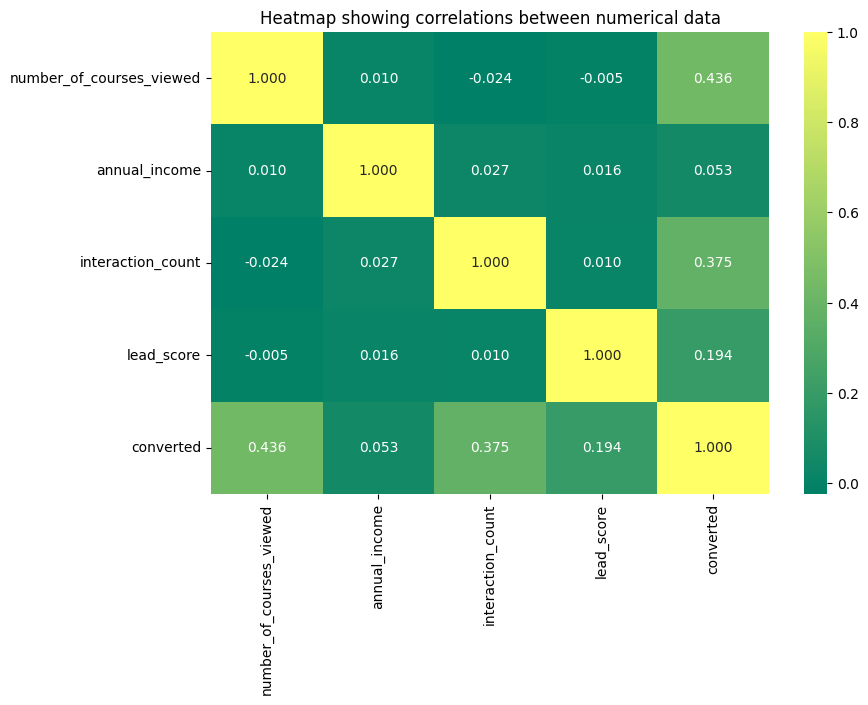

In [61]:

plt.figure(figsize=(9, 6))
sns.heatmap(df[numerical_columns].corr(), cmap="summer", annot=True, fmt='.3f')
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [62]:
sum_of_df = len(df_test)+len(df_train)+len(df_val)
print(sum_of_df,len(df))
assert len(df) == sum_of_df


df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
print(len(df_train),len(df_val),len(df_test))

y_train = df_train['converted'].values
y_val = df_val['converted'].values
y_test= df_test['converted'].values

del df_train['converted']
del df_val['converted']
del df_test['converted']
if 'converted' in numerical_columns:
    numerical_columns.remove('converted')



def mutual_info_score_series(series):
    return mutual_info_score(series,y_train)

mi=df_train[categorical_columns].apply(mutual_info_score_series)
round(mi.sort_values(ascending=False),2)

1462 1462
876 293 293


lead_source          0.04
employment_status    0.01
industry             0.01
location             0.00
dtype: float64

In [63]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_columns + numerical_columns].to_dict(orient = 'records')
print(train_dict)
X_train=dv.fit_transform(train_dict)

val_dict = df_val[categorical_columns + numerical_columns].to_dict(orient = 'records')
X_val=dv.transform(val_dict)

test_dict = df_test[categorical_columns + numerical_columns].to_dict(orient = 'records')
X_test=dv.transform(test_dict)

Accuracy_score = 0
def buildLogitic_Regression(c):
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    #print(X_train.shape)
    return model
 
model=buildLogitic_Regression(1)
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
Accuracy_score = accuracy_score(y_train,y_pred_train)
print(round(Accuracy_score,2))


y_pred= model.predict(X_val)
Accuracy_score =accuracy_score(y_val,y_pred)
print(round(Accuracy_score,2))

y_fulltrain = np.concatenate([y_train,y_val])
X_fulltrain_dict = train_dict+val_dict
X_fulltrain = dv.fit_transform(X_fulltrain_dict)
print(X_fulltrain.shape)
model.fit(X_fulltrain,y_fulltrain)
y_pred_n = model.predict(X_test)
print(round(accuracy_score(y_test,y_pred_n),2))

[{'lead_source': 'paid_ads', 'industry': 'retail', 'employment_status': 'student', 'location': 'middle_east', 'number_of_courses_viewed': 0, 'annual_income': 58472.0, 'interaction_count': 5, 'lead_score': 0.03}, {'lead_source': 'organic_search', 'industry': 'manufacturing', 'employment_status': 'student', 'location': 'middle_east', 'number_of_courses_viewed': 3, 'annual_income': 71738.0, 'interaction_count': 6, 'lead_score': 0.77}, {'lead_source': 'paid_ads', 'industry': 'technology', 'employment_status': 'employed', 'location': 'north_america', 'number_of_courses_viewed': 3, 'annual_income': 81973.0, 'interaction_count': 2, 'lead_score': 0.59}, {'lead_source': 'NA', 'industry': 'technology', 'employment_status': 'employed', 'location': 'europe', 'number_of_courses_viewed': 1, 'annual_income': 74956.0, 'interaction_count': 3, 'lead_score': 0.34}, {'lead_source': 'organic_search', 'industry': 'retail', 'employment_status': 'student', 'location': 'australia', 'number_of_courses_viewed': 

In [64]:
def calculate_diff_in_Accuracies(X_dataset,X_vald):
    
    model.fit(X_dataset,y_train)
    y_pred = model.predict(X_vald)
    score = accuracy_score(y_val,y_pred)
    display(Accuracy_score,score)
    return Accuracy_score-score

totalcolumns = categorical_columns+numerical_columns
differences = {}
for c in totalcolumns:
    df_new = df_train.copy()
    df_val_new =df_val.copy().drop(c,axis=1)
    df_new = df_new.drop(c,axis=1)
    #print(c)
    #print(df_new.T)
    xnew_dict = df_new.to_dict(orient ='records')
    xval_dic =df_val_new.to_dict(orient ='records')
    X_new_train =dv.fit_transform(xnew_dict)
    x_vald = dv.transform(xval_dic)
    differences[c]=round(calculate_diff_in_Accuracies(X_new_train,x_vald),3)
differences

0.6996587030716723

0.7030716723549488

0.6996587030716723

0.6996587030716723

0.6996587030716723

0.6962457337883959

0.6996587030716723

0.7098976109215017

0.6996587030716723

0.5563139931740614

0.6996587030716723

0.8532423208191127

0.6996587030716723

0.5563139931740614

0.6996587030716723

0.7064846416382252

{'lead_source': -0.003,
 'industry': 0.0,
 'employment_status': 0.003,
 'location': -0.01,
 'number_of_courses_viewed': 0.143,
 'annual_income': -0.154,
 'interaction_count': 0.143,
 'lead_score': -0.007}

In [65]:
for c in [0.01,0.1,1,10,100]:
    model=buildLogitic_Regression(c)
    model.fit(X_train,y_train)
    y_pred= model.predict(X_val)
    Accuracy_score =accuracy_score(y_val,y_pred)
    print(c,Accuracy_score)

0.01 0.6996587030716723
0.1 0.6996587030716723
1 0.6996587030716723
10 0.6996587030716723
100 0.6996587030716723
